# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Nand Kishore Khuswaha
### Preferred Name (if different): Chosen Name
### Student ID: 013920192
### Email address: nandkishore.khuswaha@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

1) kmeans.synthetic_data.ipynb (class file)

2) knn.synthetic_data.ipynb (class file)

3) https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics


In [2]:
np.random.seed(42)

#### Code the solution

#### Generate random 2-D data

In [3]:
n = 100 #data points

X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))   #draw from a Gaussian distribution
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2)) 
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [4]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)
# print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()
dt.shape

(100, 2)

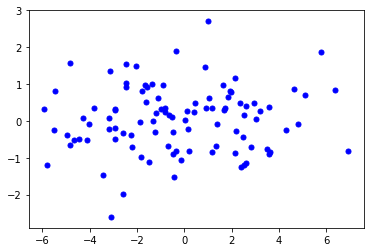

In [6]:
plt.scatter(X, Y, s =25, c = 'b')
plt.show()


In [7]:
# sns.jointplot(x=X, y=Y, kind="kde")

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)


In [9]:
def knn(newObservation, referenceData, k=3):
    final_output= []
    X_test = newObservation
    X_train = referenceData
    for i in range(len(X_test)):
        d = []
        votes = []
        for j in range(len(referenceData)):
            dist = distance.euclidean(X_train.iloc[j] , X_test.iloc[i])
            d.append([dist, j])
        d.sort()
        d = d[0:k]
        for d, j in d:
            votes.append(Y_train[j])
        ans = Counter(votes).most_common(1)[0][0]
        final_output.append(ans)
    return final_output
              

In [10]:
prediction = knn(X_test,X_train,3)
for i in prediction:
    print(i, end= ' ')

0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 

In [11]:
knn(X_test,X_train,3)

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [12]:
result = knn(X_test,X_train,3)
print("Accuracy of the predictions on the test dataset is " + 
      str( metrics.accuracy_score(Y_test, result)) )

Accuracy of the predictions on the test dataset is 0.9


Text(0.5, 1.0, 'Predicted labels')

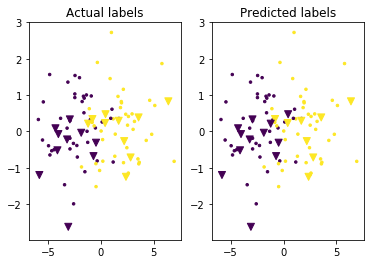

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=result, marker="v")
plt.title("Predicted labels")

#### Generate random 3-D data (Testing for 3-D data)

In [14]:
num = 1000 #data points

X1 = np.random.normal(loc=0.0, scale=3.0, size=int(num/4))   #draw from a Gaussian distribution
Y1 = np.random.normal(loc=-3.0, scale=1.0, size=int(num/4)) 
Z1 = np.random.normal(loc=-1.0, scale=1.0, size=int(num/4)) 

X2 = np.random.normal(loc=0.0, scale=3.0, size=int(num/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(num/4))
Z2 = np.random.normal(loc=1.0, scale=1.0, size=int(num/4))

X3 = np.random.normal(loc=0.0, scale=3.0, size=int(num/4))
Y3 = np.random.normal(loc=3.0, scale=1.0, size=int(num/4))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(num/4))

X4 = np.random.normal(loc=0.0, scale=3.0, size=int(num/4))
Y4 = np.random.normal(loc=5.0, scale=3.0, size=int(num/4))
Z4 = np.random.normal(loc=-3.0, scale=1.0, size=int(num/4))

X = np.concatenate((X1, X2, X3, X4), axis=0)
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)


In [15]:
dt1 = pd.DataFrame({'X':X, 'Y':Y, 'Z': Z}, columns=['X', 'Y', 'Z'])
dt1.head()
# dt1.shape

,X,Y,Z
0,1.073362,-3.062679,-1.522723
1,1.682354,-2.044858,0.049009
2,3.249154,-3.985726,-1.704344
3,3.161406,-2.495953,-2.408461
4,-4.133008,-3.530258,-2.556629


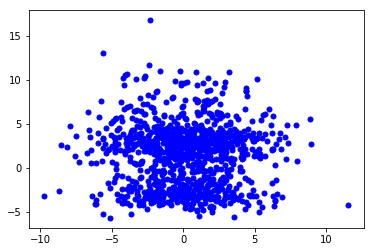

In [16]:
plt.scatter(X, Y, s =25, c = 'b')
plt.show()

In [17]:
# sns.jointplot(x=X, y=Y, kind="kde")

In [18]:
l1 = [0]*int(num/2)
l2 = [1]*int(num/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(dt1,labels, test_size=0.2, random_state=0)


In [20]:
knn(X_test,X_train,3)

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0]

In [22]:
result = knn(X_test,X_train,3)
print("Accuracy of the predictions on the test dataset is " 
      + str( metrics.accuracy_score(Y_test, result)) )

Accuracy of the predictions on the test dataset is 0.945
